[2, 2] [0, 3]
[-3, -3] [0, 1]
[-1.5, -1.5] [0, -2.5]


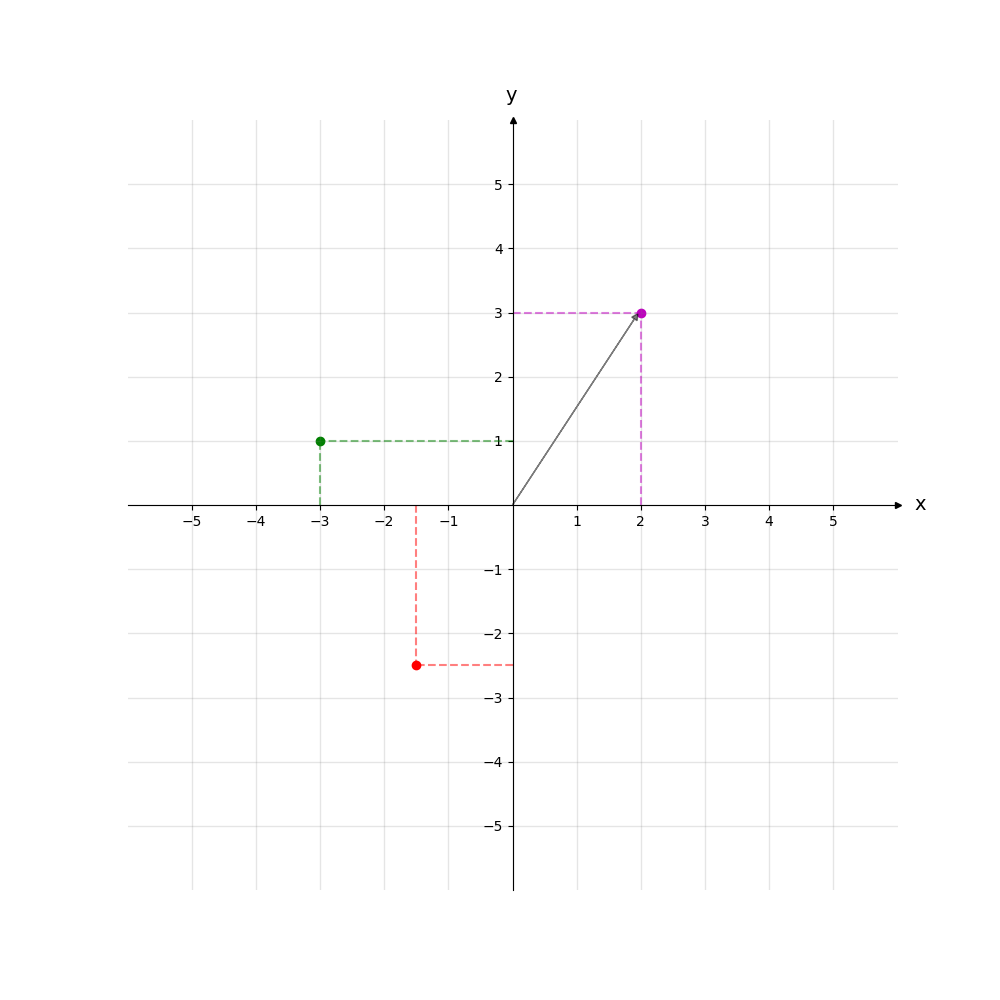

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass


@dataclass
class Point:
    x: float
    y: float


class CartesianCoordinateSystem:

    def __init__(self, grid_on=True):
        xmin, xmax, ymin, ymax = -5, 5, -5, 5
        ticks_frequency = 1
        self.figure, self.ax = plt.subplots(figsize=(10, 10))

        # Set identical scales for both axes
        self.ax.set(xlim=(xmin - 1, xmax + 1), ylim=(ymin - 1, ymax + 1), aspect='equal')

        # Set bottom and left spines as x and y axes of coordinate system
        self.ax.spines['bottom'].set_position('zero')
        self.ax.spines['left'].set_position('zero')

        # Remove top and right spines
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)

        # Create 'x' and 'y' labels placed at the end of the axes
        self.ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
        self.ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

        # Create custom major ticks to determine position of tick labels
        x_ticks = np.arange(xmin, xmax + 1, ticks_frequency)
        y_ticks = np.arange(ymin, ymax + 1, ticks_frequency)
        self.ax.set_xticks(x_ticks[x_ticks != 0])
        self.ax.set_yticks(y_ticks[y_ticks != 0])

        # Create minor ticks placed at each integer to enable drawing of minor grid
        # lines: note that this has no effect in this example with ticks_frequency=1
        self.ax.set_xticks(np.arange(xmin, xmax + 1), minor=True)
        self.ax.set_yticks(np.arange(ymin, ymax + 1), minor=True)

        if grid_on:
            self.ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

        # Draw arrows
        arrow_fmt = dict(markersize=4, color='black', clip_on=False)
        self.ax.plot((1), (0), marker='>', transform=self.ax.get_yaxis_transform(), **arrow_fmt)
        self.ax.plot((0), (1), marker='^', transform=self.ax.get_xaxis_transform(), **arrow_fmt)

    def add_point(self, point: Point, color: str = 'black', show_line: bool = False):
        print([point.x, point.x], [0, point.y])
        self.ax.scatter(point.x, point.y, c=color)

        if show_line:
            # Draw line from origin to point
            self.ax.plot([point.x, point.x], [0, point.y], c=color, ls='--', lw=1.5, alpha=0.5)
            self.ax.plot([0, point.x], [point.y, point.y], c=color, ls='--', lw=1.5, alpha=0.5)

    def add_vector(self, start: Point, end: Point, color: str = 'black'):
        head_width = 0.1
        head_length = 0.1
        x_offset = head_width
        y_offset = head_length
        if end.x < start.x:
            x_offset = -x_offset
        if end.y < start.y:
            y_offset = -y_offset
        self.ax.arrow(start.x, start.y, end.x - start.x - x_offset, end.y - start.y - y_offset, head_width=head_width, head_length=head_length,   fc=color, ec=color, alpha=0.5)
        

    def show(self) -> None:
        plt.show()


coordinate_system = CartesianCoordinateSystem()

xs = [2, -3, -1.5]
ys = [3, 1, -2.5]
colors = ['m', 'g', 'r', 'b']

for x, y, c in zip(xs, ys, colors):
    coordinate_system.add_point(Point(x, y), c, True)

coordinate_system.add_vector(Point(0, 0), Point(2, 3), 'k')
coordinate_system.show()